# <center>Livrable Projet DATA SCIENCE</center>

## Livrable 1 - Prétraitement (denoising/sharpening…)

Le but est de traiter un ensemble de photographies afin de les rendre mieux traitables par les algorithmes de Machine Learning. Il y a deux traitements à réaliser : le débruitage, et l’affutage. Vous devrez produire un notebook Jupyter explicitant ces étapes de prétraitement, et leurs performances. Ces algorithmes s’appuieront sur des notions assez simples autour des filtres de convolution, et les appliqueront pour améliorer la qualité de l’image. Il faudra notamment décider d’un compromis entre dé-bruitage et affutage.

Le notebook devra intégrer :
<ul>
    <li>Le code de chargement du fichier.</li>
    <li>Le code du débruitage sur un sous-ensemble d’images bruitées. Le code doit être accompagné d’explications.</li>
    <li>Le code de l’affutage sur un sous-ensembles d’images floutées. Le code doit être accompagné d’explications.</li>
    <li>
        Une étude de cas explicitant les compromis entre ces deux opérations. Cette partie du livrable doit inclure le bruitage d’images et montrer la perte de détails, ou l’affutage d’images et montrer l’apparition du bruit.
    </li>
</ul>

<b>Ce livrable est à fournir pour le 18/12/2020</b>

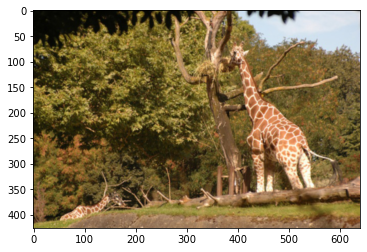

In [1]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import misc

# Path to the 'to modify' images
IMAGES_PATH = "./Dataset/"
IMAGE_TYPE = "Blurry/blurry_"
IMAGE_EXT = ".jpg"

# Open single picture
img = imageio.imread(IMAGES_PATH + IMAGE_TYPE + '001' + IMAGE_EXT)

# Display the choosen image
plt.imshow(img)

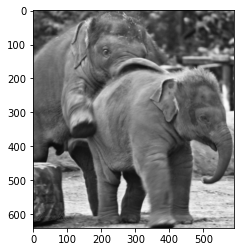

In [2]:
from skimage import io

# Convert RGB image to grey image
grey_img = io.imread(IMAGES_PATH + IMAGE_TYPE + '033' + IMAGE_EXT, as_gray=True) 

plt.imshow(grey_img, cmap=plt.get_cmap('gray'))
plt.show()

In [16]:
sharpning_filter = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

def add_covolution(image, array):
    return ndimage.convolve(image, array)


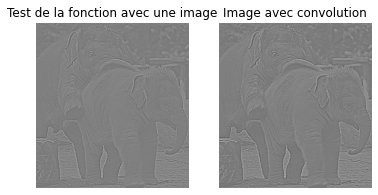

In [17]:
from scipy import ndimage

def remove_blurry(image):
    alpha = 60
    filter_blurred_f = ndimage.gaussian_filter(image, sigma=1)
    return image + alpha * (image - filter_blurred_f) 

# Test de la fonction avec une image
image_test_defloutee = remove_blurry(grey_img)

# Image avec convolution
image_test_defloutee_with_convol = add_covolution(remove_blurry(grey_img), sharpning_filter)

plt.subplot(121)
plt.imshow(image_test_defloutee, cmap=plt.cm.gray)
plt.axis('off')
plt.title("Test de la fonction avec une image")

plt.subplot(122)
plt.imshow(image_test_defloutee_with_convol, cmap=plt.cm.gray)
plt.axis('off')
plt.title("Image avec convolution")

plt.show()